In [3]:
# Блок 1: Імпорт і завантаження лексикону
import nltk
nltk.download('opinion_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import opinion_lexicon, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import random
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Блок 2: Генерація фейкового корпусу
positive_words = list(opinion_lexicon.positive())
negative_words = list(opinion_lexicon.negative())

# Генеруємо по 1000 речень на клас
def generate_sentence(word_list, length=7):
    return ' '.join(random.choices(word_list, k=length))

positive_sentences = [generate_sentence(positive_words) for _ in range(1000)]
negative_sentences = [generate_sentence(negative_words) for _ in range(1000)]

data = pd.DataFrame({
    'text': positive_sentences + negative_sentences,
    'label': [1]*1000 + [0]*1000  # 1 = позитив, 0 = негатив
})
data.sample(5)


,text,label
1108,stunt quarrels worrying d*mn crumpled taunt sl...,0
1628,disable illusions disaffect stupidest disappoi...,0
1633,concerned dislike smallish faulty deviate setb...,0
75,mature strong magnificent sensitive stylized g...,1
1843,castigate puny hum crashing rascal dungeon lam...,0


In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# Блок 3: Попередня обробка
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered = [stemmer.stem(w) for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(filtered)

data['clean_text'] = data['text'].apply(preprocess)
data[['text', 'clean_text']].head()


,text,clean_text
0,perfectly exhilarating heartening commodious f...,perfectli exhilar hearten commodi fascin ador ...
1,suave relaxed grace remarkably loves agilely a...,suav relax grace remark love agil amusingli
2,quieter restored admirer rectify revolutionize...,quieter restor admir rectifi revolution versat...
3,soothingly enviousness ideally painless aspira...,soothingli envious ideal painless aspir supurb...
4,unreal sumptuously humour intelligent wonderfu...,unreal sumptuous humour intellig wonder flutte...


In [8]:
# Блок 4: Векторизація та навчання
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['clean_text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



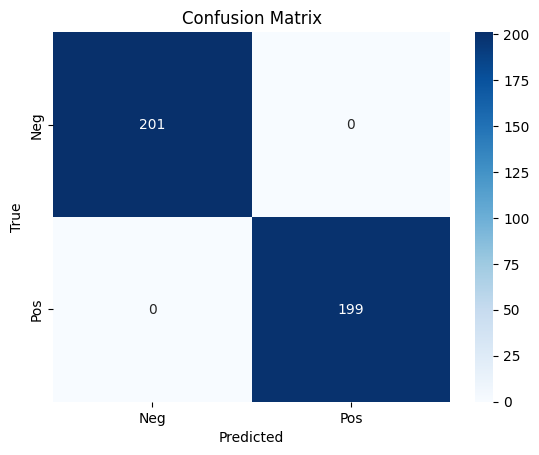

In [9]:
# Блок 5: Оцінка
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()